In [1]:
%%capture
import os
os.chdir('..')
%run -i Pan_Tompkins.ipynb
os.chdir('scripts')

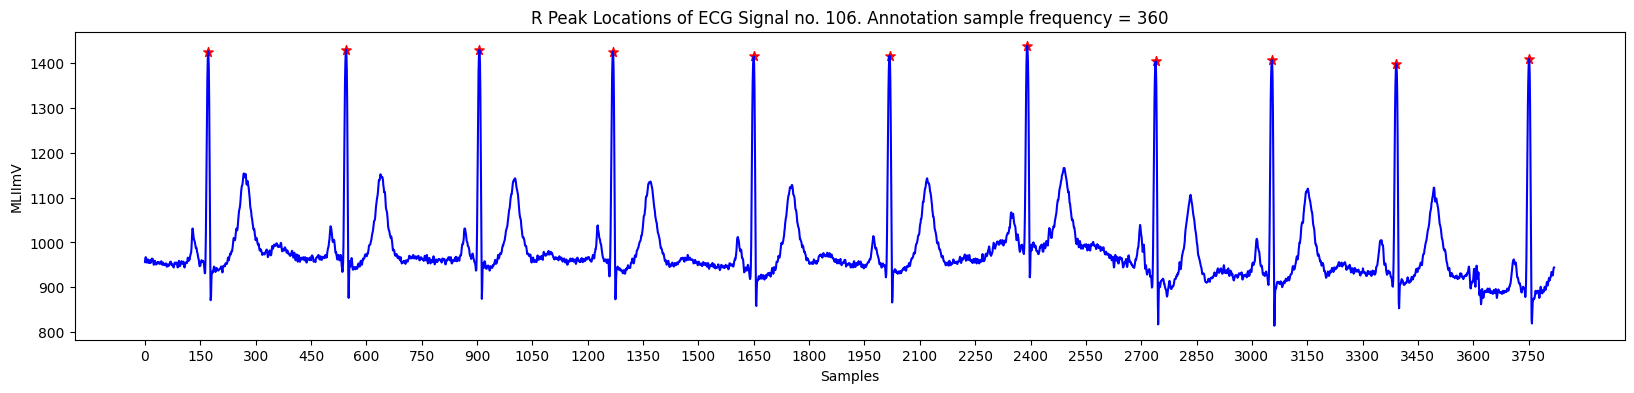

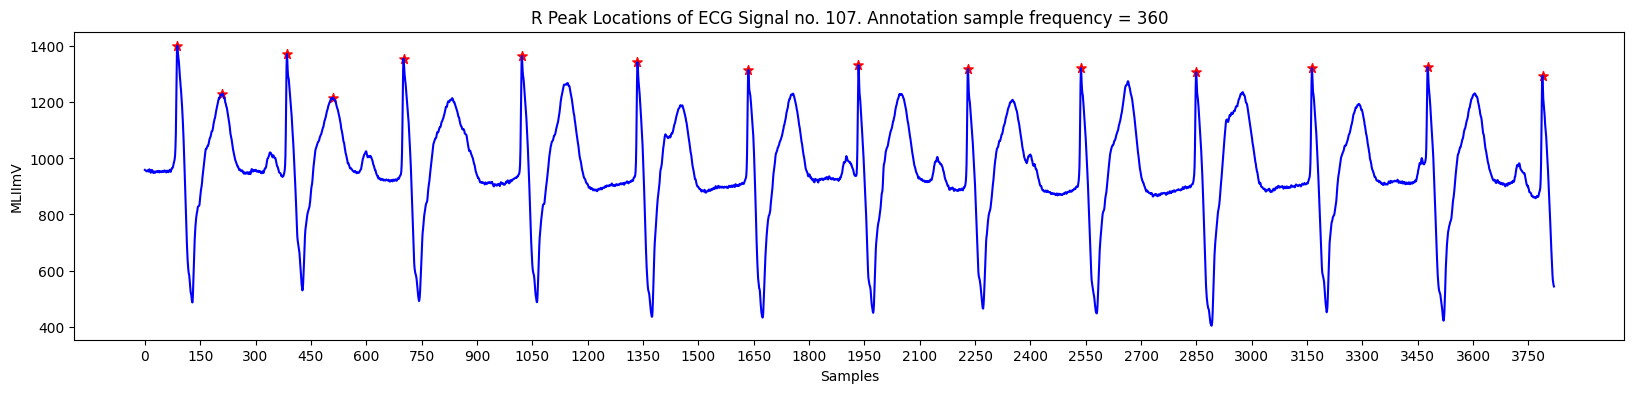

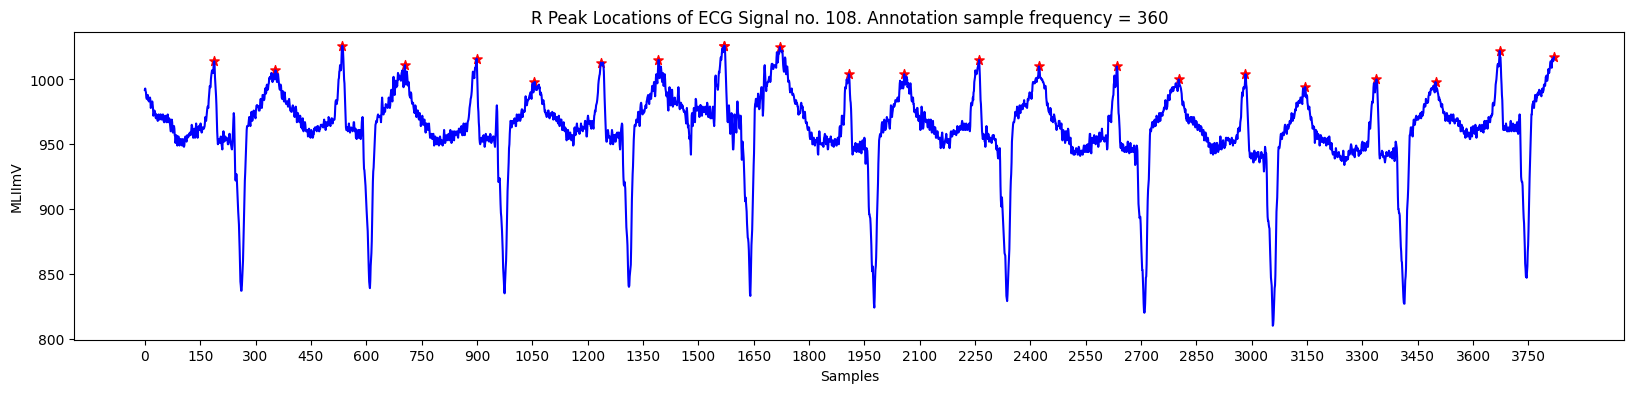

In [2]:
#@title Choose ECG Signal { form-width: "20%", display-mode: "both" }
signal_number = [6,7,8] #@param {type:"slider", min:0, max:9, step:1}

# for each signal in the list
for i in signal_number:
    # read the signal
    filename = f'../mit-bih-arrhythmia-database-1.0.0/{str(100 + i)}'
    record = wfdb.rdrecord(filename, sampfrom=180, sampto=4000,)    
    annotation = wfdb.rdann(filename, 'atr', sampfrom=180, sampto=4000,shift_samps=True)

    QRS_detector = Pan_Tompkins_QRS()
    ecg = pd.DataFrame(np.array([list(range(len(record.adc()))),record.adc()[:,0]]).T,columns=['TimeStamp','ecg'])
    output_singal = QRS_detector.solve(ecg)

    # Convert ecg signal to numpy array
    signal = ecg.iloc[:,1].to_numpy()

    # Find the R peak locations
    hr = heart_rate(signal,annotation.fs)
    result = hr.find_r_peaks()
    result = np.array(result)

    # Clip the x locations less than 0 (Learning Phase)
    result = result[result > 0]

    # Save the extracted R peak locations
    np.save(f'../extracted_data/coord_x_r_peaks_no_{str(100+i)}.npy',result)

    # Plotting the R peak locations in ECG signal
    plt.figure(figsize = (20,4), dpi = 100)
    plt.xticks(np.arange(0, len(signal)+1, 150))
    plt.plot(signal, color = 'blue')        
    plt.scatter(result, signal[result], color = 'red', s = 50, marker= '*')
    plt.xlabel('Samples')
    plt.ylabel('MLIImV')
    plt.title("R Peak Locations of ECG Signal no. "+str(100+i)+". Annotation sample frequency = "+str(annotation.fs))
    plt.show()